## Linear Regression Overview

Linear regression is a supervised machine learning algorithm that establishes a linear relationship between independent variables (features) and a dependent variable (output). The goal is to find the optimal weights \($ \mathbf{w} $\) that minimize the loss, typically measured using the Mean Squared Error (MSE). We’ll explore this process using matrix notation for efficiency.

### Original Notation
For \($ m $\) samples and \($ n $\) features, the linear regression equation for a single sample is:

$$
y = w_0 + w_1 x_1 + w_2 x_2 + \ldots + w_n x_n
$$

The cost function (MSE) is defined as:

$$
J(\mathbf{w}) = \frac{1}{m} \sum_{i=1}^m \left( y_t^{(i)} - y(x^{(i)}) \right)^2
$$

where \($ y_t^{(i)} $\) is the true value, and \($ y(x^{(i)}) $\) is the predicted value for the \($ i $\)-th sample.

## Matrix Notation Setup

To simplify computations, we convert the linear regression problem into matrix form:

- **True values**: \($ \mathbf{Y} $\) is an \($ m \times 1 $\) column vector of ground truth values:
  $$
  \mathbf{Y}_{m \times 1} = \begin{bmatrix}
  y_1 \\
  y_2 \\
  \vdots \\
  y_m
  \end{bmatrix}
  $$

- **Weights**: \($ \mathbf{W} $\) is an \($ (n+1) \times 1 $\) column vector, including the bias term \($ w_0 $\):
  $$
  \mathbf{W}_{(n+1) \times 1} = \begin{bmatrix}
  w_0 \\
  w_1 \\
  \vdots \\
  w_n
  \end{bmatrix}
  $$

- **Feature matrix**: \($ \mathbf{X} $\) is an \($ m \times (n+1) $\) matrix, where each row represents a sample, and the first column is all 1s (for the bias term):
  $$
  \mathbf{X}_{m \times (n+1)} = \begin{bmatrix}
  1 & x_{11} & x_{12} & \cdots & x_{1n} \\
  1 & x_{21} & x_{22} & \cdots & x_{2n} \\
  \vdots & \vdots & \vdots & \ddots & \vdots \\
  1 & x_{m1} & x_{m2} & \cdots & x_{mn}
  \end{bmatrix}
  $$

The predicted values are computed as \($ \mathbf{Y}' = \mathbf{X} \mathbf{W} $\), which has shape \($ m \times 1 $\).

## Deriving the Cost Function in Matrix Notation

Let’s derive the MSE cost function step-by-step:

### Step 1: Compute Predicted Values
The predicted values are:
$$
\mathbf{Y}'_{m \times 1} = \mathbf{X} \mathbf{W}
$$

### Step 2: Compute the Loss
The loss vector \($ \mathbf{L} $\) is the difference between true and predicted values:
$$
\mathbf{L}_{m \times 1} = \mathbf{Y} - \mathbf{Y}' = \mathbf{Y} - \mathbf{X} \mathbf{W}
$$

### Step 3: Sum of Squared Errors
To compute the sum of squared errors, multiply the transpose of \($ \mathbf{L} $\) by \($ \mathbf{L} $\):
$$
\mathbf{L}^T \mathbf{L} = \sum_{i=1}^m \left( y_i - y_i' \right)^2
$$

### Step 4: Compute MSE
Divide by the number of samples \($ m $\) to get the MSE:
$$
J(\mathbf{W}) = \frac{1}{m} (\mathbf{Y} - \mathbf{X} \mathbf{W})^T (\mathbf{Y} - \mathbf{X} \mathbf{W})
$$

## Computing the Optimal Weights

To find the optimal weights \($ \mathbf{W} $\), we minimize the cost function by taking the derivative with respect to \($ \mathbf{W} $\), setting it to zero, and solving.

### Step 1: Compute the First Derivative
Using the chain rule:

$$
\frac{\partial J}{\partial W} = \frac{\partial}{\partial W} \left[ (Y - XW)^T (Y - XW) \right]
$$

$$
= \left[ \frac{\partial}{\partial W} ((Y - XW)^T) \ast (Y - XW) \right] + \left[ (Y - XW)^T \ast \frac{\partial}{\partial W} (Y - XW) \right]
$$

$$
= -X^T (Y - XW) + (Y - XW)^T (-X)
$$

$$
= -X^T Y + X^T XW - YX + XW^T X
$$

$$
= -2X^T Y + 2X^T XW
$$

### Step 2: Set to Zero and Solve
Set the derivative to zero:
$$
-2 \mathbf{X}^T \mathbf{Y} + 2 \mathbf{X}^T \mathbf{X} \mathbf{W} = 0
$$
Simplify:
$$
\mathbf{X}^T \mathbf{X} \mathbf{W} = \mathbf{X}^T \mathbf{Y}
$$

$$
(X^T X)^{-1} X^T XW = (X^T X)^{-1} X^T Y
$$

Solve for \($ \mathbf{W} $\):
$$
\mathbf{W} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}
$$

This is known as the **Normal Equation**.

## Proving Convexity

To determine convexity, we need to check the second derivative for matrices. The second derivative of the cost function \($ J $\), known as the Hessian \($ H $\), organizes second-order partial derivatives in matrix form:

- \($ J(W) $\) is **strictly convex** if \($ H $\) is a Positive Definite Matrix.
- \($ J(W) $\) is **convex** if \($ H $\) is a Positive Semi-Definite Matrix.
- \($ J(W) $\) is **strictly concave** if \($ H $\) is a Negative Definite Matrix.
- \($ J(W) $\) is **concave** if \($ H $\) is a Negative Semi-Definite Matrix.

Computing \($ H $\), we have:

$$
H = \frac{\partial^2 J}{\partial W^2} = \frac{\partial J}{\partial W} \left[-2X^T Y + 2X^T XW\right] = 2X^T X
$$

To prove strict convexity, \($ X^T X $\) must be positive definite. A symmetric matrix \($ A $\) is positive definite if:

$$
A = B^T B
$$

for some matrix \($ B $\) with linearly independent columns.

Since \($ X^T X $\) is symmetric, the MSE cost function is convex if the columns of \($ X $\) are linearly independent. Alternatively, for MSE to be convex, the rank of \($ X $\) must equal the number of columns in \($ X $\), i.e., \($ n $\).

Thus, MSE is convex if the feature vector has linearly independent columns or has rank equal to the number of features.

## Step 1: Visualize the Data
First, let's visualize the relationships between all features and the target variable using a correlation matrix and pairplot.

      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


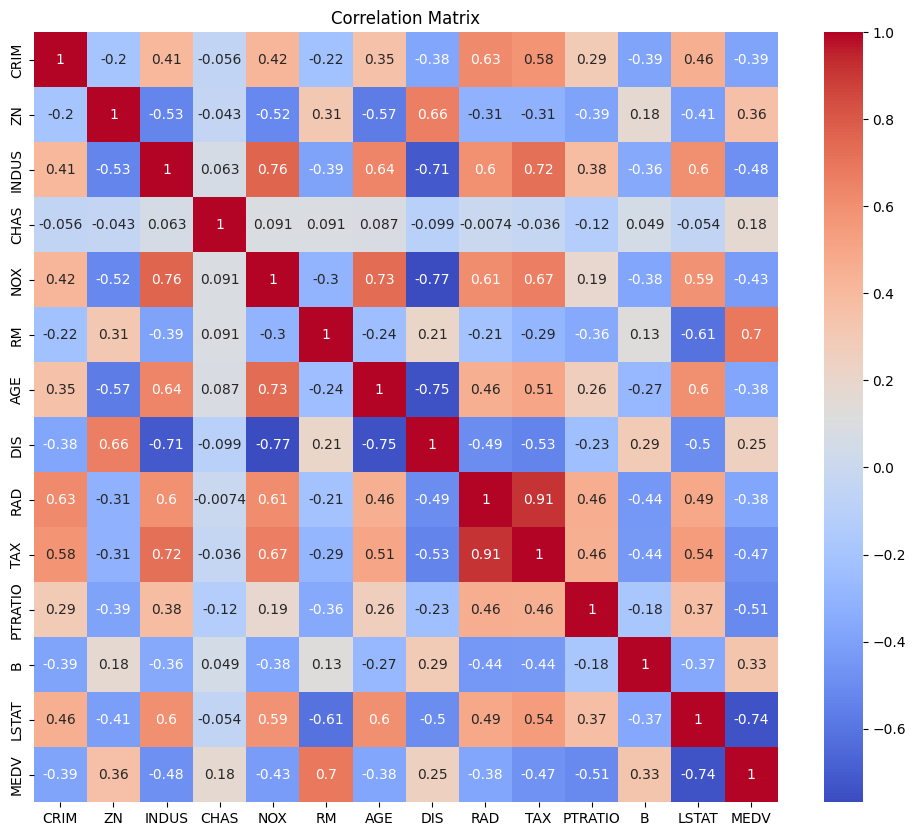

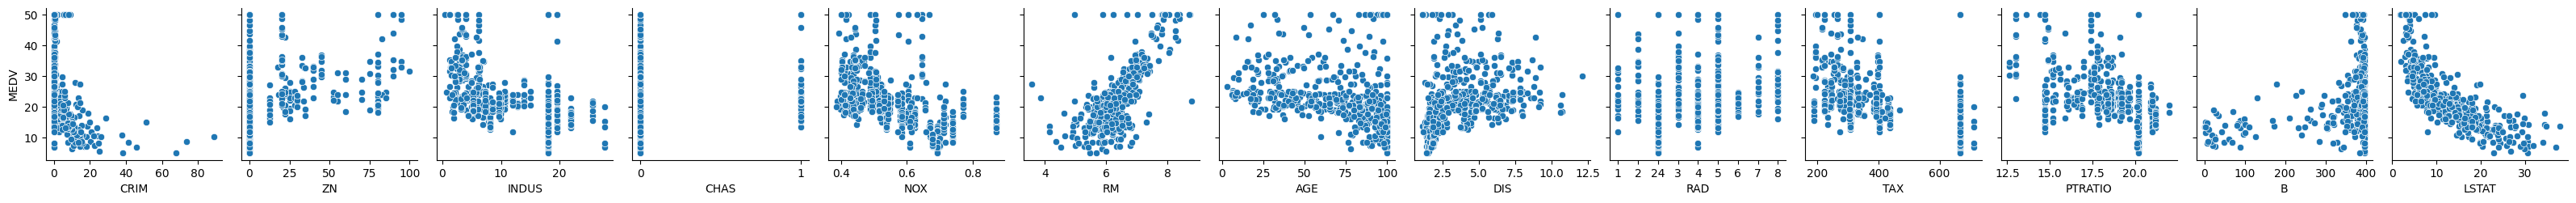

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Load Boston housing dataset from OpenML
data = fetch_openml(name="boston", version=1, as_frame=True)
X, y = data.data, data.target

# Combine features and target into a single DataFrame
df = pd.concat([X, y.rename("MEDV")], axis=1)

# Display the first few rows of the DataFrame
print(df.head())

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, y_vars=["MEDV"], x_vars=df.columns[:-1])
plt.show()

## Step 2: Select Features

After visualizing the data, you can select the features that have a strong correlation with the target variable. For example, if you find that RM (average number of rooms per dwelling) and LSTAT (percentage of lower status of the population) have strong correlations with MEDV (median value of owner-occupied homes), you can select these features for training.

In [2]:
# Select specific features based on correlation analysis
selected_features = ['RM', 'LSTAT']  # Example features
X = X[selected_features]

## How to Normalize Data in a Matrix

Normalization is essential in Machine Learning to ensure that all features contribute equally to the model. Here are different methods to normalize a matrix in Python:

### Min-Max Normalization (Feature Scaling)

#### **Introduction**

Min-Max Normalization is a technique used to scale features to a specific range, typically [0, 1]. This is particularly useful in machine learning algorithms that are sensitive to the scale of input data, such as gradient descent-based methods.

#### **Formula**

The formula for Min-Max Normalization is:

$$
X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$

Where:
- $X$ is the original value.
- $X_{\text{min}}$ is the minimum value in the dataset.
- $X_{\text{max}}$ is the maximum value in the dataset.
- $X'$ is the normalized value.

#### **Steps**

1. **Identify the Minimum and Maximum Values**: Determine the minimum and maximum values for each feature in the dataset.
2. **Apply the Formula**: Use the formula to scale each feature to the range [0, 1].
3. **Transform the Dataset**: Replace the original values with the normalized values.

In [16]:
# Convert columns to float
X = X.astype(float)
y = y.astype(float)

# Min-Max Normalization
X_min = np.min(X, axis=0)
X_max = np.max(X, axis=0)
X_norm = (X - X_min) / (X_max - X_min)

# Min-Max Normalization
y_min = np.min(y, axis=0)
y_max = np.max(y, axis=0)
y_norm = (y - y_min) / (y_max - y_min)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Display the selected features
print("Selected features for training:")
print(X_train.head())

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Selected features for training:
           RM     LSTAT
477  0.333972  0.639625
15   0.435524  0.185982
332  0.473271  0.168322
423  0.487066  0.594923
19   0.415022  0.263521


### Z-Score Normalization (Standardization)

#### **Introduction**

Z-Score Normalization, or Standardization, is a technique used to scale features so that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1. This is particularly useful for algorithms that assume the input data is normally distributed.

#### **Formula**

The formula for Z-Score Normalization is:

$$
Z = \frac{X - \mu}{\sigma}
$$

**Where**:
- $X$ is the original value.
- $\mu$ is the mean of the dataset.
- $\sigma$ is the standard deviation of the dataset.
- $Z$ is the standardized value.

#### **Steps**

1. **Calculate the Mean**: Compute the mean $\mu$ of the dataset.
2. **Calculate the Standard Deviation**: Compute the standard deviation $\sigma$ of the dataset.
3. **Apply the Formula**: Use the formula to transform each feature to have a mean of 0 and a standard deviation of

In [5]:
# Convert columns 3 and 8 to float
X = X.astype(float)
y = y.astype(float)

# Standardization (Z-score Normalization)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_zscore = (X - X_mean) / X_std

# Standardization (Z-score Normalization)
y_mean = np.mean(y, axis=0)
y_std = np.std(y, axis=0)
y_zscore = (y - y_mean) / y_std

X_train, X_test, y_train, y_test = train_test_split(X_zscore, y_zscore, test_size=0.2, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Display the selected features
print("Selected features for training:")
print(X_train.head())

## Calculating the Weight Matrix ($W$) Using the Normal Equation

#### **Introduction**

In linear regression, the goal is to find the optimal parameters (weights) that minimize the cost function (Mean Squared Error). One efficient way to compute these optimal parameters is by using the **Normal Equation**.

#### **Normal Equation**

The Normal Equation provides a closed-form solution to find the optimal weight vector $W$:

$$
W = (X^T X)^{-1} X^T Y
$$

Where:

- $W$ is the weight vector (parameters) we want to calculate.
- $X$ is the feature matrix (with dimensions $m \times (n+1)$, where $m$ is the number of samples and $n$ is the number of features; the extra column is for the bias term).
- $Y$ is the target vector (with dimensions $m \times 1$).

In [17]:
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

## Evaluating the Model on Test Data

Since Fashion MNIST is a classification dataset, we’ll evaluate the linear regression model in two ways:
1. **Regression Metric**: Compute the Mean Squared Error (MSE) by treating the labels as continuous values.
2. **Classification Metric**: Convert the regression predictions to class labels (by rounding) and compute accuracy.

### Analysis of Results

- **MSE**: The MSE on the test set indicates how well the linear regression model predicts the labels as continuous values. A high MSE suggests that linear regression may not be the best model for this classification task.

- **Accuracy**: By converting the predictions to class labels, we get a sense of how well the model performs as a classifier. However, since linear regression isn’t designed for classification, the accuracy might be low compared to a proper classifier (e.g., logistic regression or a neural network).

- **Overfitting/Underfitting**:
  - If the training MSE is much lower than the test MSE, the model might be overfitting.
  - If both MSEs are high, the model might be underfitting (as discussed earlier: $ J_{\text{train}}(\mathbf{w}) \approx J_{\text{test}}(\mathbf{w}) \gg 0 $).


In [18]:
# Compute predictions on the test set
y_pred = X_test @ w

# Compute MSE
mse = np.mean((y_test - y_pred) ** 2)
print("Mean Squared Error (MSE) on test set:", mse)

# Optional: Compute MSE on training set for comparison
y_train_pred = X_train @ w
mse_train = np.mean((y_train - y_train_pred) ** 2)
print("Mean Squared Error (MSE) on training set:", mse_train)

Mean Squared Error (MSE) on test set: 0.017817723321848052
Mean Squared Error (MSE) on training set: 0.016118460026861584


In [19]:
# Convert regression predictions to class labels (round to nearest integer and clip to 0-9)
y_pred_class = np.clip(np.round(y_pred).astype(int), 0, 9)
y_test_class = y_test.astype(int)

# Compute accuracy
accuracy = np.mean(y_pred_class == y_test_class)
print("Classification accuracy on test set:", accuracy)

# Optional: Compute accuracy on training set
y_train_pred_class = np.clip(np.round(y_train_pred).astype(int), 0, 9)
train_accuracy = np.mean(y_train_pred_class == y_train)
print("Classification accuracy on training set:", train_accuracy)

Classification accuracy on test set: 0.8235294117647058
Classification accuracy on training set: 0.0297029702970297


# Convert regression predictions to class labels (round to nearest integer and clip to 0-9)
y_pred_class = np.clip(np.round(y_pred).astype(int), 0, 9)
y_test_class = y_test.astype(int)

# Compute accuracy
accuracy = np.mean(y_pred_class == y_test_class)
print("Classification accuracy on test set:", accuracy)

# Optional: Compute accuracy on training set
y_train_pred_class = np.clip(np.round(y_train_pred).astype(int), 0, 9)
train_accuracy = np.mean(y_train_pred_class == y_train)
print("Classification accuracy on training set:", train_accuracy)